<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

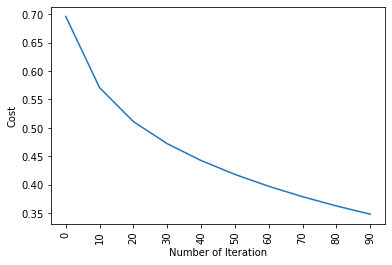

test accuracy : 92.74447949526814 %.
Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741
Cost after iteration 50: 0.418369
Cost after iteration 60: 0.397485
Cost after iteration 70: 0.379209
Cost after iteration 80: 0.363009
Cost after iteration 90: 0.348522
Cost after iteration 100: 0.335479
Cost after iteration 110: 0.323672
Cost after iteration 120: 0.312932
Cost after iteration 130: 0.303120
Cost after iteration 140: 0.294122
Cost after iteration 150: 0.285840
Cost after iteration 160: 0.278192
Cost after iteration 170: 0.271109
Cost after iteration 180: 0.264530
Cost after iteration 190: 0.258403
Cost after iteration 200: 0.252683
Cost after iteration 210: 0.247332
Cost after iteration 220: 0.242314
Cost after iteration 230: 0.237600
Cost after iteration 240: 0.233163
Cost after iteration 250: 0.228979
Cost after iteration 260: 0.225027
Cost after iteration 270: 0.2

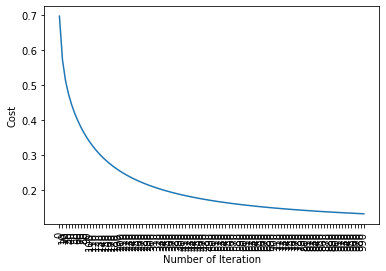

test accuracy : 97.94952681388013 %.
test accuracy 0.9826498422712934


In [73]:

"""
# Introduction to Gender Voice Recognation with Logistic Regression

# Index of Contents

* [Read Data and Check Features](#1)
* [Adjustment of Label values (male = 1, female = 0)](#2)
* [Data Normalization](#3)
* [Split Operation for Train and Test Data](#4)
* [Matrix creation function for initial weight values](#5)
* [Sigmoid function declaration](#6)
* [Forward and Backward Propogation](#7)
* [Updating Parameters](#8)
* [Prediction with Test Data](#9)
* [Logistic Regression Implementation](#10)
* [Logistic Regression with sklearn](#11)
"""


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
# print(os.listdir("input"))

"""
Read Data and Check Features
"""

data = pd.read_csv("voice.csv")

# Get some information about our data
data.info()

"""
***Adjustment of Label values (male = 1, female = 0***
* After getting information about data we'll call male as 1 and female as 0***
"""

data.label = [1 if each == "male" else 0 for each in data.label]

data.info() # now we have label as integer

"""
***Data Normalization***
"""

y = data.label.values # main results male or female
x_data = data.drop(["label"], axis = 1) # prediction components

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values # all data evaluated from 1 to 0

"""
***Split Operation for Train and Test Data***
* Data is splitted for training and testing operations. We'll have %20 of data for test and %80 of data for train after split operation.
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Data Shapes
print("x_train.shape : ", x_train.shape)
print("x_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

# Transform features to rows (Transpose)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

"""
***Matrix creation function for initial weight values***
"""

def initializeWeightsAndBias(dimension): # according to our data dimension will be 20
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w,b

"""
***Sigmoid function declaration***
"""

def sigmoid(z):
    y_head = (1 / (1 + np.exp(-z)))
    return y_head

"""
***Forward and Backward Propogation***
* Get z values from sigmoid function and calculate loss and cost.
"""

x_train.shape[1]

def forward_backward_propogation(w, b, x_train, y_train):

    #forward propogation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1] # x_train.shape[1] is for scaling

    #backward propogation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1] # x_train.shape[1] is for scaling
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1] # x_train.shape[1] is for scaling
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}

    return cost, gradients

"""
***Updating parameters***
* Our purpose is find to optimum weight and bias values using derivative of these values.
"""

def update(w, b, x_train, y_train, learningRate, numberOfIteration):
    cost_list = []
    cost_list2 = []
    index = []

    # updating(learning) parameters is number_of_iteration times
    for i in range(numberOfIteration):
        # make forward and backward propogation and find costs and gradients
        cost,gradients = forward_backward_propogation(w, b, x_train, y_train)
        cost_list.append(cost)
        #lets update
        w = w - learningRate * gradients["derivative_weight"]
        b = b - learningRate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))

    # we update(learn) paramters weights and bias
    parameters = {"weight" : w, "bias" : b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

"""
***Prediction with Test Data***
* Prediction using test data which is splitted first.
"""

def predict(w,b, x_test):
    # x_test is an input for forward propogation
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is Male (y_head = 1)
    # if z is smaller than 0.5, our prediction is Female (y_head = 0)
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

"""
***Logistic Regression Implementation***
"""

def logistic_regression(x_train, y_train, x_test, y_test, learningRate, numberOfIterations):
    dimension = x_train.shape[0] # that is 20 (feature count of data)
    w,b = initializeWeightsAndBias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learningRate, numberOfIterations)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    print("test accuracy : {} %.".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

#Let's try our model and check costs and prediction results.
logistic_regression(x_train, y_train, x_test, y_test, learningRate = 1, numberOfIterations = 100)

logistic_regression(x_train, y_train, x_test, y_test, learningRate = 1, numberOfIterations = 1000)

"""As you see above, when the iteration is increased, accuracy increasing too.

***Logistic Regression with sklearn***
* Logistic Regression Classification can be done with sklearn library. All codes which are written above correspond to the codes below.
"""

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
print("test accuracy {}".format(lr.score(x_test.T, y_test.T)))

In [74]:
# Transform features to rows (Transpose)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

# Data Shapes
print("x_train.shape : ", x_train.shape)
print("x_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

x_train.shape :  (2534, 20)
x_test.shape :  (634, 20)
y_train.shape :  (2534,)
y_test.shape :  (634,)


In [75]:
type(x_train)

pandas.core.frame.DataFrame

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
def training(activation='relu', has_dropout=False, mid_n = 8 ):
    # define model
    model = Sequential()
    model.add(Dense(32, input_shape = (x_train.shape[1], ) ))    # train shape is like 1000 X 100
    model.add(Activation(activation))
    model.add(Dense(16, activation=activation))
    if has_dropout:
        model.add(Dropout(0.2))
    model.add(Dense(mid_n, activation=activation))
    if has_dropout:
        model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    #compile
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #fit
    history = model.fit(x_train, y_train,validation_split=0.2, epochs=100, batch_size=128)
    return model, history

In [77]:
def evaluating(model, history):
    test_score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss :{:0.4f}'.format(test_score[0]))
    print('Test accuracy :{:0.2f}'.format(test_score[1]))
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.show()

In [78]:
#relu
model, history = training(activation='relu')

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 32)                672       
                                                                 
 activation_42 (Activation)  (None, 32)                0         
                                                                 
 dense_85 (Dense)            (None, 16)                528       
                                                                 
 dense_86 (Dense)            (None, 8)                 136       
                                                                 
 dense_87 (Dense)            (None, 1)                 9         
                                                                 
 activation_43 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-train

Test loss :0.0587
Test accuracy :0.98


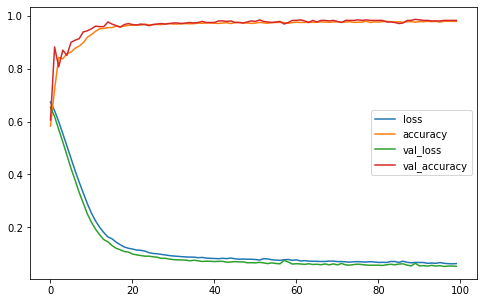

In [79]:
evaluating(model, history)

In [80]:
# sigmoid
model, history = training(activation='sigmoid')

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 32)                672       
                                                                 
 activation_44 (Activation)  (None, 32)                0         
                                                                 
 dense_89 (Dense)            (None, 16)                528       
                                                                 
 dense_90 (Dense)            (None, 8)                 136       
                                                                 
 dense_91 (Dense)            (None, 1)                 9         
                                                                 
 activation_45 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-train

Test loss :0.0990
Test accuracy :0.97


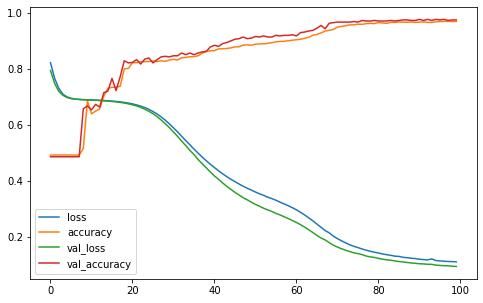

In [81]:
evaluating(model, history)

In [82]:
# tanh
model, history = training(activation='tanh')

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 32)                672       
                                                                 
 activation_46 (Activation)  (None, 32)                0         
                                                                 
 dense_93 (Dense)            (None, 16)                528       
                                                                 
 dense_94 (Dense)            (None, 8)                 136       
                                                                 
 dense_95 (Dense)            (None, 1)                 9         
                                                                 
 activation_47 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-train

Test loss :0.0715
Test accuracy :0.97


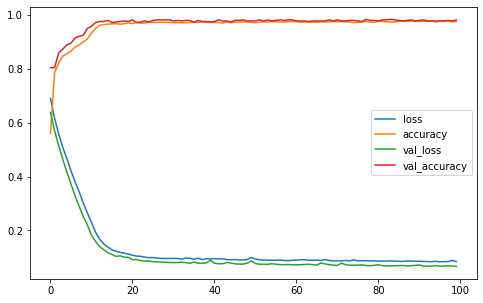

In [83]:
evaluating(model, history)

In [84]:
# dropout
model, history = training(activation='relu',has_dropout=True )

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 32)                672       
                                                                 
 activation_48 (Activation)  (None, 32)                0         
                                                                 
 dense_97 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_98 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_99 (Dense)            (None, 1)               

Test loss :0.0646
Test accuracy :0.98


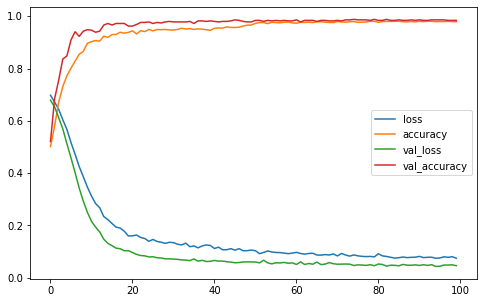

In [85]:
evaluating(model, history)


In [86]:
# اثر تعداد نورون های وسط
n_mids = [i for i in range(1,21)]
acc = []
for n_mid in n_mids:
    model, history = training(activation='relu',has_dropout=True )
    test_score = model.evaluate(x_test, y_test, verbose=0)
    acc.append(test_score[1])


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 32)                672       
                                                                 
 activation_50 (Activation)  (None, 32)                0         
                                                                 
 dense_101 (Dense)           (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_102 (Dense)           (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_103 (Dense)           (None, 1)               

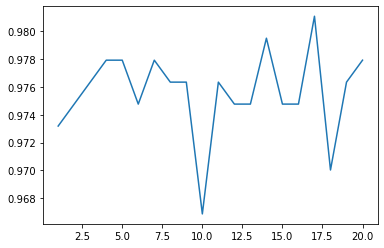

In [87]:
plt.plot(n_mids,acc)
